# COMMERCIAL OPTIMIZATION. Origin of Travelers

**Objective Sprint 4**  
Adjust business strategy (pricing, promotions, services) based on tourism trends from INE (Spain’s National Statistics Institute) to better match traveler demand.

• Is it necessary to adjust our offerings to **`traveler's profile`** and the `demand for overnight stays` in the cities where we are present, considering the official figures on origin, months of visit, and average overnight stays per autonomous city?

**Description and characteristics of dataset**  
External data:  
[Hotel occupancy survey from the National Institute of Statistics](https://www.ine.es/dynt3/inebase/es/index.htm?padre=238&dh=1)

In [1]:
# import libraries 
import os
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# font sizes
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14             
plt.rcParams['axes.labelsize'] = 14  

plt.rcParams['xtick.labelsize'] = 12      
plt.rcParams['ytick.labelsize'] = 12       
plt.rcParams['legend.fontsize'] = 12

# display settings
#pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
 
# set palette
#custom_palette = ['#4e6e81', '#a79e9c', '#b3bcc3', '#f2f1f1', '#888f96', '#256fb6', '#ecf0f5', '#354859', '#f69731']
#sns.set_palette(custom_palette)
sns.set_palette('Paired')

sns.set_style("whitegrid")

In [3]:
PATH = 'Data'

## International vs Domestic
Table used: [Viajeros y pernoctaciones por comunidades autónomas y provincias](https://www.ine.es/jaxiT3/Tabla.htm?t=2074&L=0)  
Loaded data is from 01-2022 to 03-2025.

*Notes*:  
- Debido a distintas actualizaciones en los directorios de establecimientos, no son directamente comparables los datos de distintos años. Existen coeficientes de enlace para los períodos: año 2005, junio2009-mayo2010, julio2010-febrero2012.
- Establecimientos hoteleros: los datos de abril del año 2024 y posteriores son provisionales.

### Data Loading

In [4]:
FILENAME = 'INE_Encuesta_de_ocupación_hotelera_2074_filtered.csv'

In [5]:
# define function to read file
def read_file(filename, encoding='latin1'):
    
    """Input: name of the file.
    Function reads .csv data of desired file. 
    Output: Dataframe or error.
    """
    
    # reading file
    try:
        df = pd.read_csv(os.path.join('..', PATH, filename), encoding=encoding, sep=';')
        display(df.head())
        return df
    except Exception as error:
        print("An exception occurred:", error)
        return error

In [6]:
df = read_file(FILENAME)

Totales Territoriales Comunidades y Ciudades Autónomas         Provincias  \
0        Total Nacional                04 Balears, Illes  07 Balears, Illes   
1        Total Nacional                04 Balears, Illes  07 Balears, Illes   
2        Total Nacional                04 Balears, Illes  07 Balears, Illes   
3        Total Nacional                04 Balears, Illes  07 Balears, Illes   
4        Total Nacional                04 Balears, Illes  07 Balears, Illes   

  Residencia: Nivel 1   Residencia: Nivel 2 Viajeros y pernoctaciones  \
0               Total  Residentes en España                   Viajero   
1               Total  Residentes en España                   Viajero   
2               Total  Residentes en España                   Viajero   
3               Total  Residentes en España                   Viajero   
4               Total  Residentes en España                   Viajero   

   Periodo    Total  
0  2025M03  106.917  
1  2025M02   55.690  
2  2025M01   28.073  
3  2024M12   43.134  
4  2024M11   42.317

In [7]:
for col in df.drop(['Periodo', 'Total'], axis=1):
    print(df[col].unique())
    print('*****')

['Total Nacional']
*****
['04 Balears, Illes' '09 Cataluña' '13 Madrid, Comunidad de'
 '01 Andalucía' '10 Comunitat Valenciana']
*****
['07 Balears, Illes' '08 Barcelona' '17 Girona' '28 Madrid' '29 Málaga'
 '41 Sevilla' '46 Valencia/València']
*****
['Total']
*****
['Residentes en España' 'Residentes en el Extranjero']
*****
['Viajero' 'Pernoctaciones']
*****


In [8]:
df.isna().sum()

Totales Territoriales               0
Comunidades y Ciudades Autónomas    0
Provincias                          0
Residencia: Nivel 1                 0
Residencia: Nivel 2                 0
Viajeros y pernoctaciones           0
Periodo                             0
Total                               0
dtype: int64

### Data cleaning

In [9]:
# drop/rename columns
df = (df.drop(['Totales Territoriales', 'Residencia: Nivel 1', 'Comunidades y Ciudades Autónomas'],axis=1)
        .pivot(index=['Provincias', 'Residencia: Nivel 2', 'Periodo'], columns='Viajeros y pernoctaciones', values='Total')
        .reset_index()
        .rename(columns={'Residencia: Nivel 2': 'Residencia', 'Viajero': 'total_travelers', 'Pernoctaciones': 'total_overnight_stays'})
     )
df.columns.name = None
df

Provincias                   Residencia  Periodo  \
0       07 Balears, Illes         Residentes en España  2022M01   
1       07 Balears, Illes         Residentes en España  2022M02   
2       07 Balears, Illes         Residentes en España  2022M03   
3       07 Balears, Illes         Residentes en España  2022M04   
4       07 Balears, Illes         Residentes en España  2022M05   
..                    ...                          ...      ...   
541  46 Valencia/València  Residentes en el Extranjero  2024M11   
542  46 Valencia/València  Residentes en el Extranjero  2024M12   
543  46 Valencia/València  Residentes en el Extranjero  2025M01   
544  46 Valencia/València  Residentes en el Extranjero  2025M02   
545  46 Valencia/València  Residentes en el Extranjero  2025M03   

    total_overnight_stays total_travelers  
0                  44.476          20.603  
1                 107.070          42.557  
2                 177.559          60.834  
3                 336.559         111.992  
4                 525.630         174.365  
..                    ...             ...  
541               191.526          80.142  
542               198.573          82.348  
543               226.385          90.702  
544               256.398         105.641  
545               323.560         125.753  

[546 rows x 5 columns]

In [10]:
# change data types
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%YM%m')
df['total_overnight_stays'] = df['total_overnight_stays'].str.replace('.', '', regex=False).astype(int)
df['total_travelers'] = df['total_travelers'].str.replace('.', '', regex=False).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Provincias             546 non-null    object        
 1   Residencia             546 non-null    object        
 2   Periodo                546 non-null    datetime64[ns]
 3   total_overnight_stays  546 non-null    int64         
 4   total_travelers        546 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 21.5+ KB


In [11]:
# clean the 'Provincias' column
df['Provincias'] = df['Provincias'].str.replace(r'^\d+\s*', '', regex=True)
df['Provincias'] = df['Provincias'].str.split(r'[/,]').str[0]

df['Provincias'].unique()

array(['Balears', 'Barcelona', 'Girona', 'Madrid', 'Málaga', 'Sevilla',
       'Valencia'], dtype=object)

In [12]:
# add column with average stay (days)
df['avg_stay'] = df['total_overnight_stays'] / df['total_travelers']

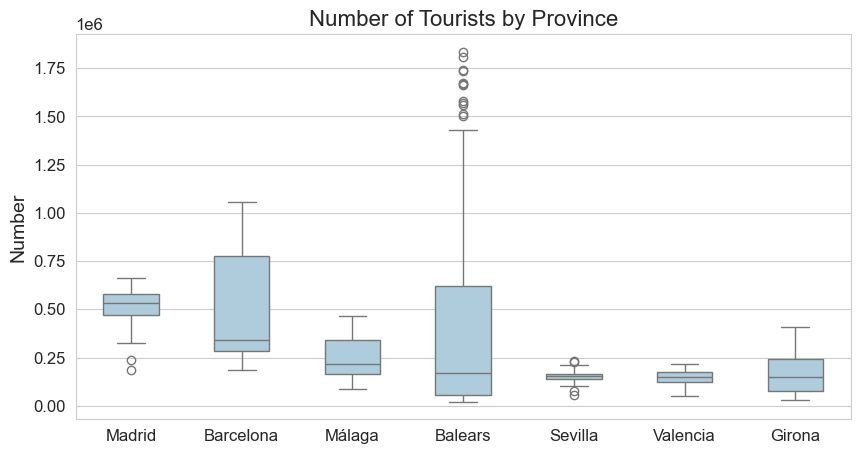

In [13]:
# boxplots
median_order = df.groupby('Provincias')['total_travelers'].median().sort_values(ascending=False).index

plt.figure(figsize=(10,5))
sns.boxplot(data=df,
            x='Provincias', y='total_travelers',
            width=0.5,
            order=median_order
           )

plt.title(f'Number of Tourists by Province')
plt.xlabel(None)
plt.ylabel('Number')
plt.show()

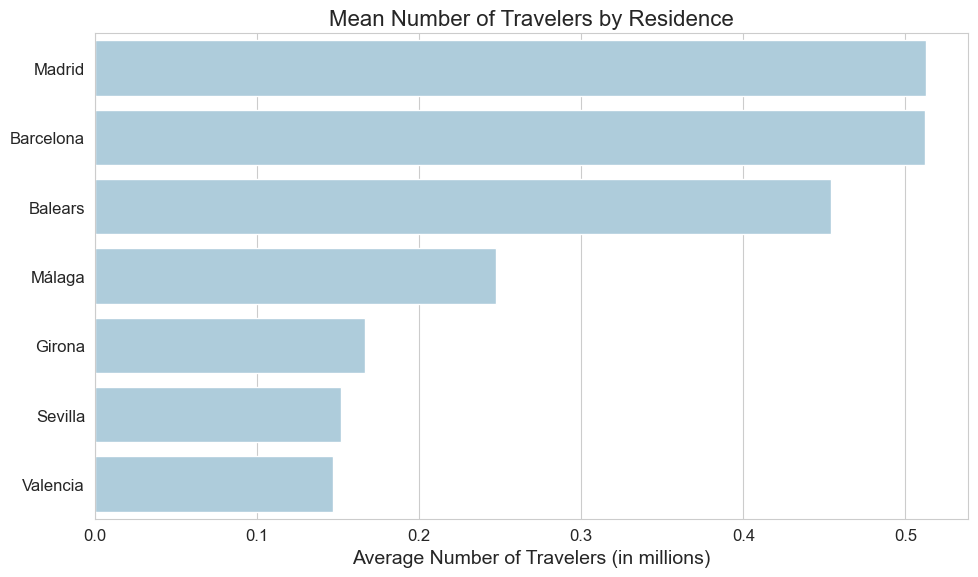

In [14]:
# means for ordering
mean_order = df.groupby('Provincias')['total_travelers'].mean().sort_values(ascending=False).index

# barplot 
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            y='Provincias',
            x=df['total_travelers'] / 1000000,
            estimator='mean',
            order=mean_order,
            errorbar=None)

plt.xlabel('Average Number of Travelers (in millions)')
plt.ylabel(None)
plt.title('Mean Number of Travelers by Residence')
plt.tight_layout()
plt.show()

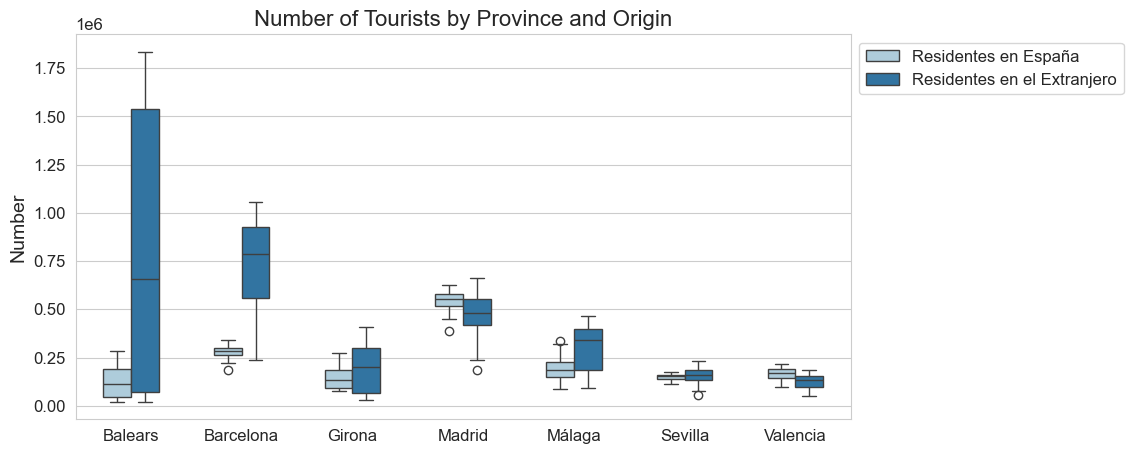

In [15]:
# boxplots
plt.figure(figsize=(10,5))
sns.boxplot(data=df,
            x='Provincias', y='total_travelers',
            hue='Residencia',
            width=0.5
           )

plt.title(f'Number of Tourists by Province and Origin')
plt.legend(title=None, bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel(None)
plt.ylabel('Number')
plt.show()

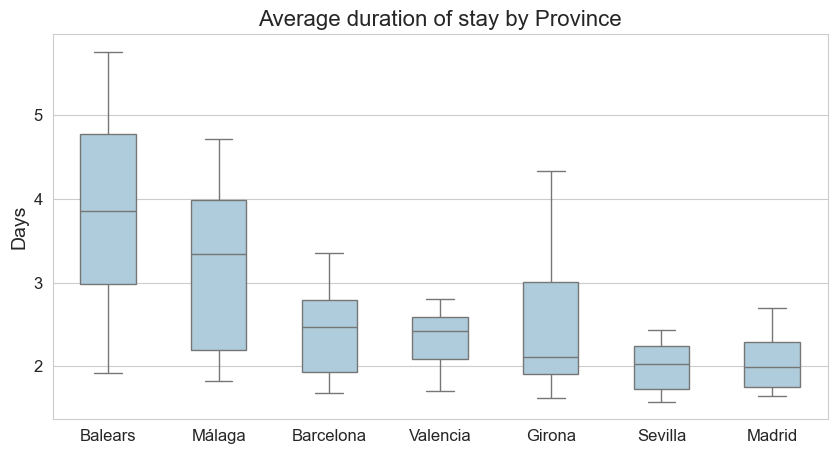

In [16]:
# boxplots
plt.figure(figsize=(10,5))
sns.boxplot(data=df,
            x='Provincias', y='avg_stay',
            width=0.5,
            order=df.groupby('Provincias')['avg_stay'].median().sort_values(ascending=False).index
           )

plt.title('Average duration of stay by Province')
plt.xlabel(None)
plt.ylabel('Days')
plt.show()

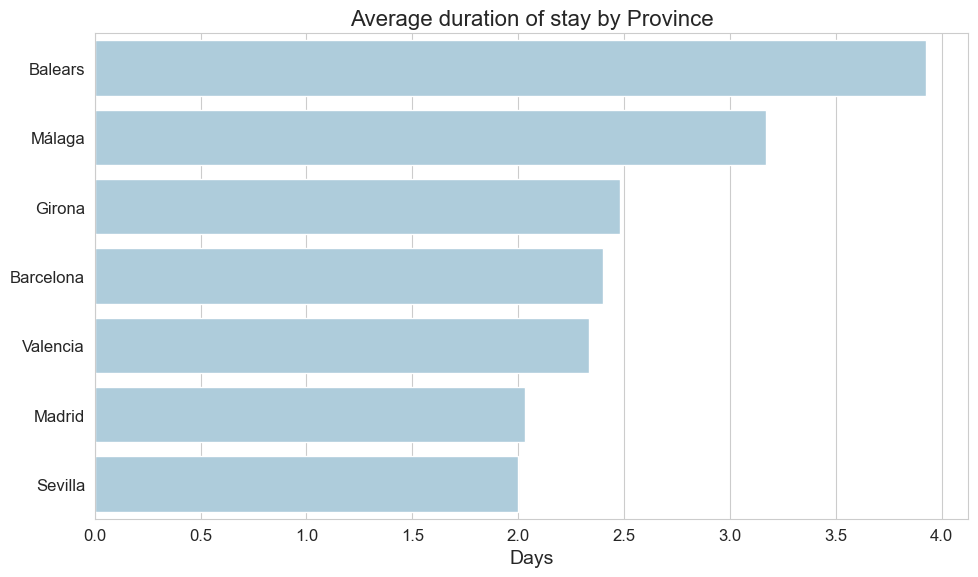

In [17]:
# means for ordering
mean_order = df.groupby('Provincias')['avg_stay'].mean().sort_values(ascending=False).index

# barplot 
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            y='Provincias',
            x=df['avg_stay'],
            estimator='mean',
            order=mean_order,
            errorbar=None)

plt.xlabel('Days')
plt.ylabel(None)
plt.title('Average duration of stay by Province')
plt.tight_layout()
plt.show()

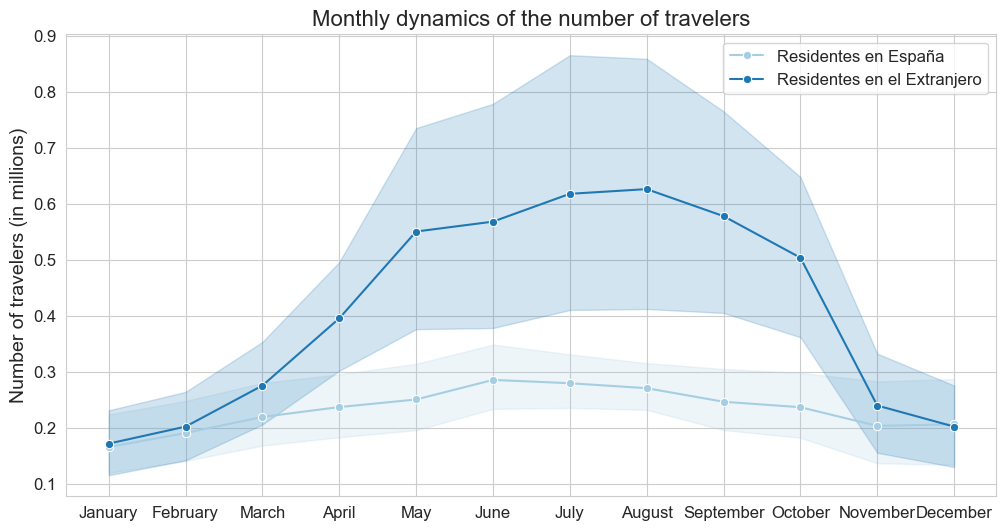

In [18]:
# lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df['Periodo'].dt.month_name(), y=df['total_travelers']/1000000, hue='Residencia', marker='o')

plt.title('Monthly dynamics of the number of travelers')
plt.xlabel(None)
plt.ylabel('Number of travelers (in millions)')
plt.legend(title=None)
plt.show()

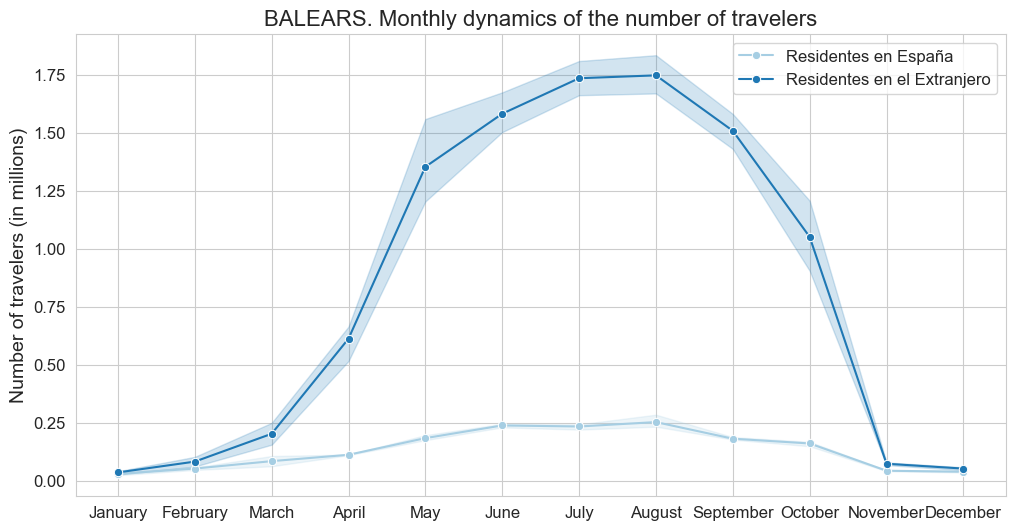

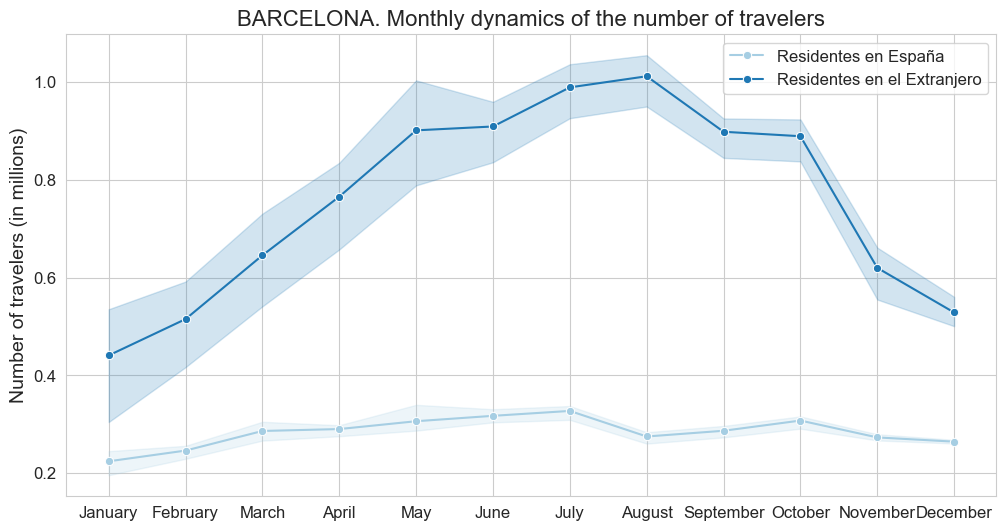

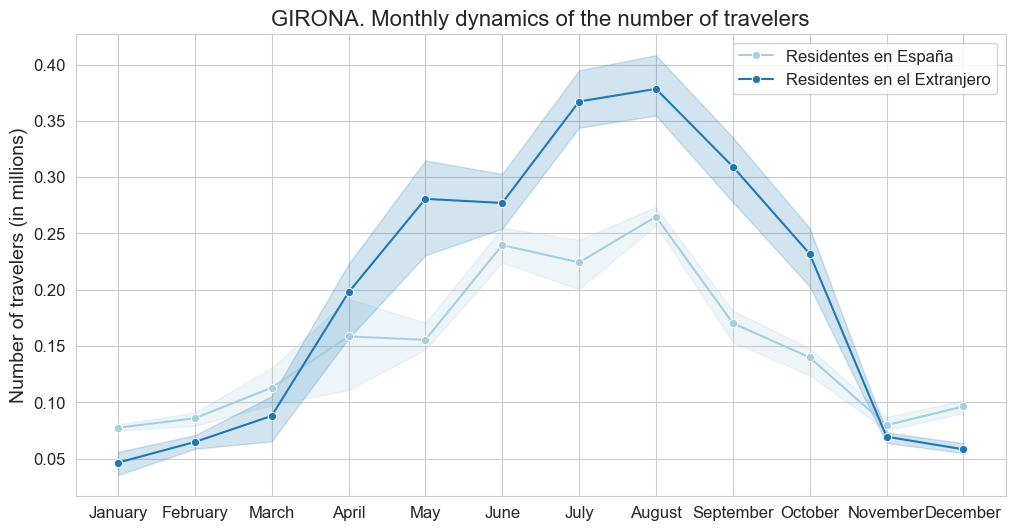

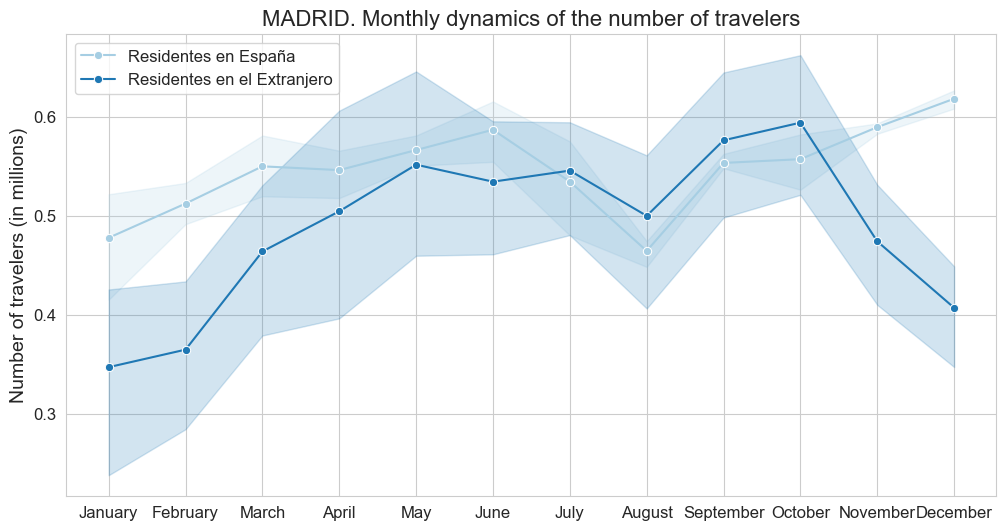

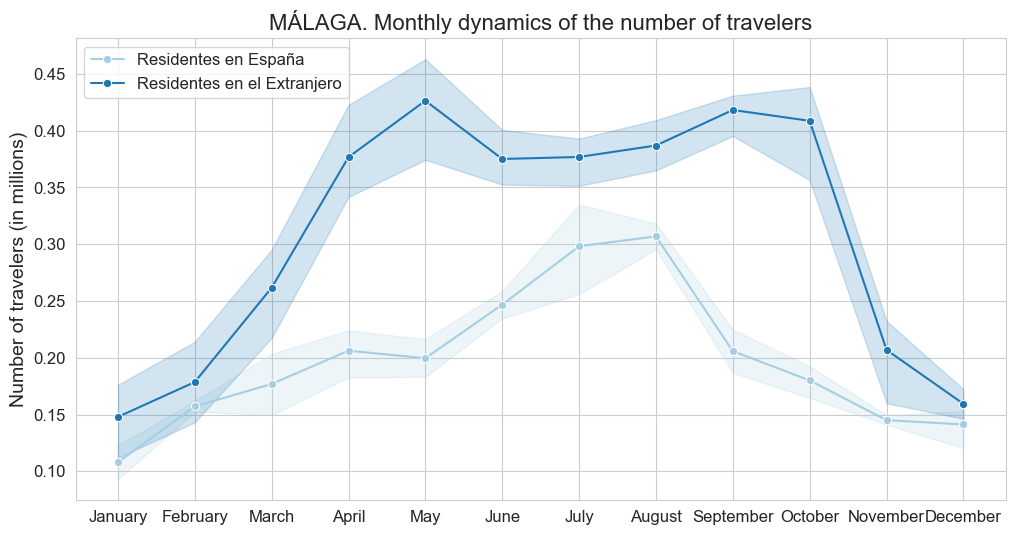

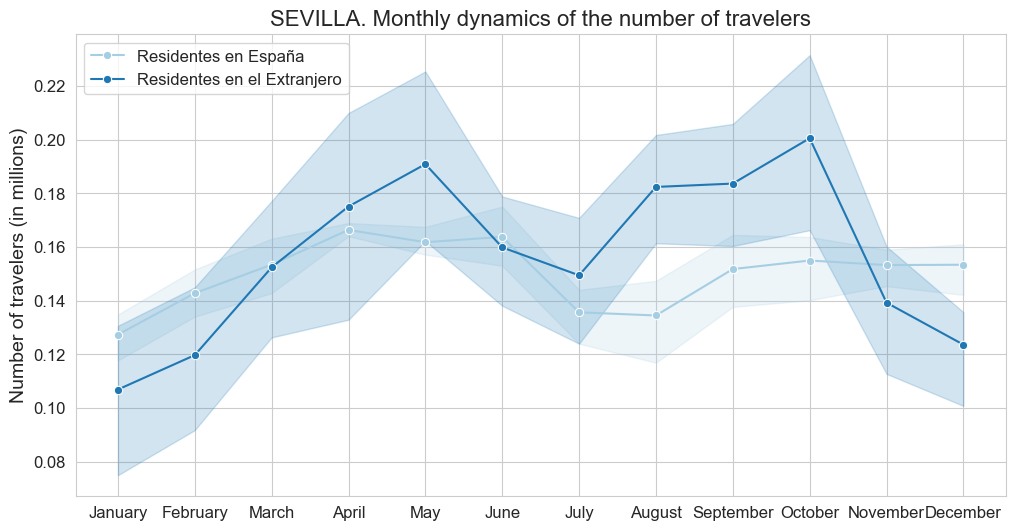

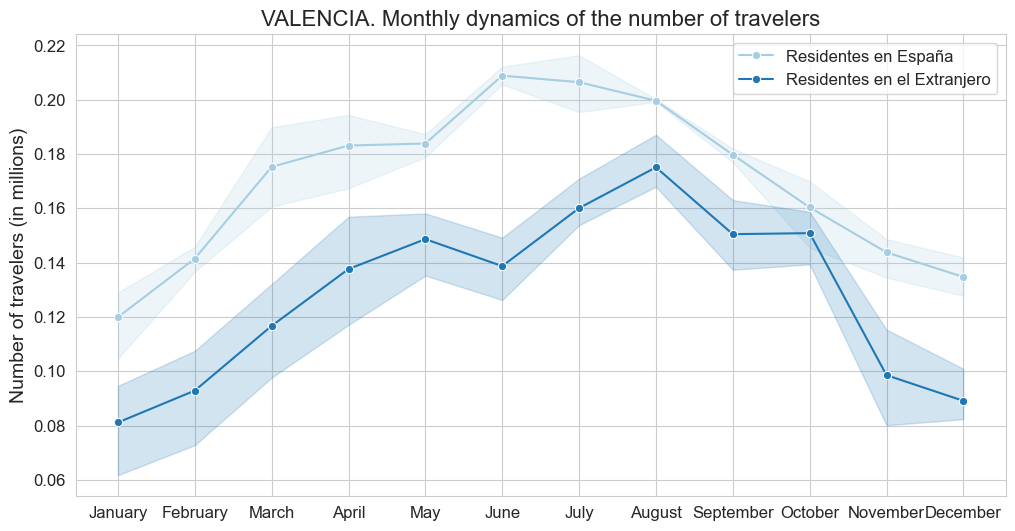

In [19]:
for prov in df['Provincias'].unique():
    
    # lineplot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df.query('Provincias == @prov'), 
                 x=df['Periodo'].dt.month_name(), 
                 y=df['total_travelers']/1000000, 
                 hue='Residencia', marker='o')
    
    plt.title(f'{prov.upper()}. Monthly dynamics of the number of travelers')
    plt.xlabel(None)
    plt.ylabel('Number of travelers (in millions)')
    plt.legend(title=None)
    plt.show()

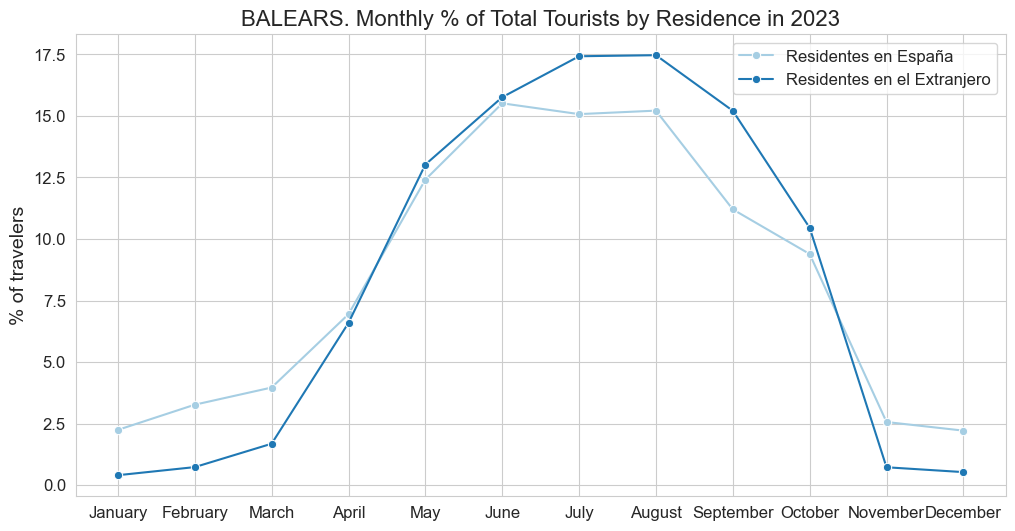

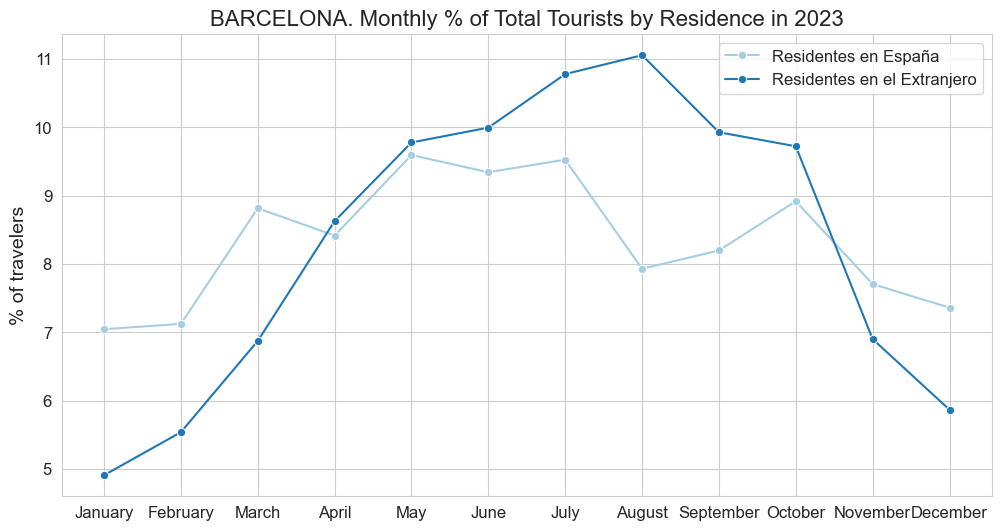

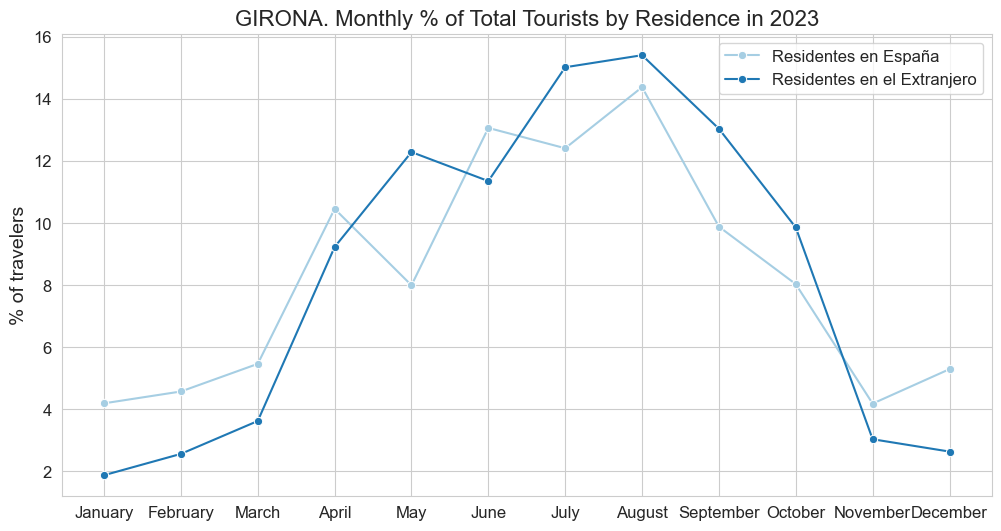

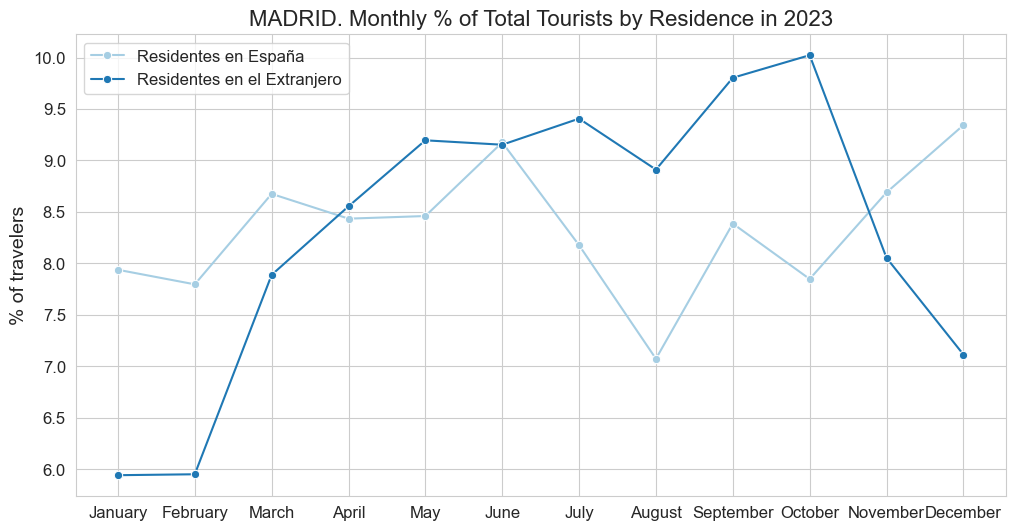

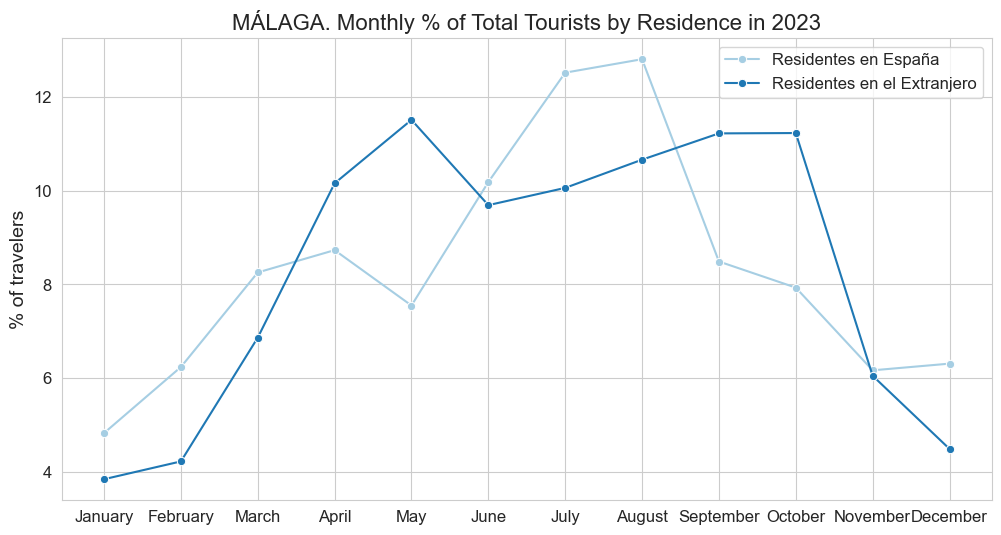

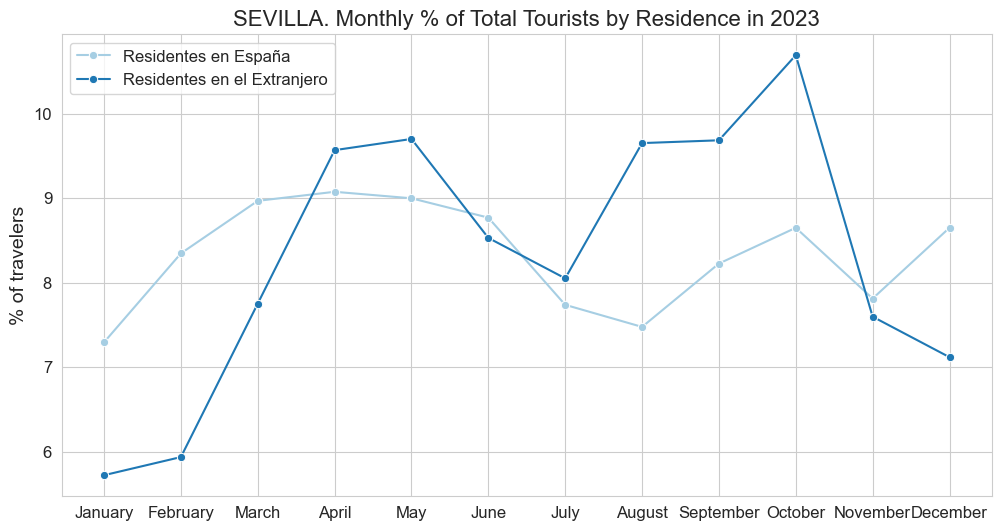

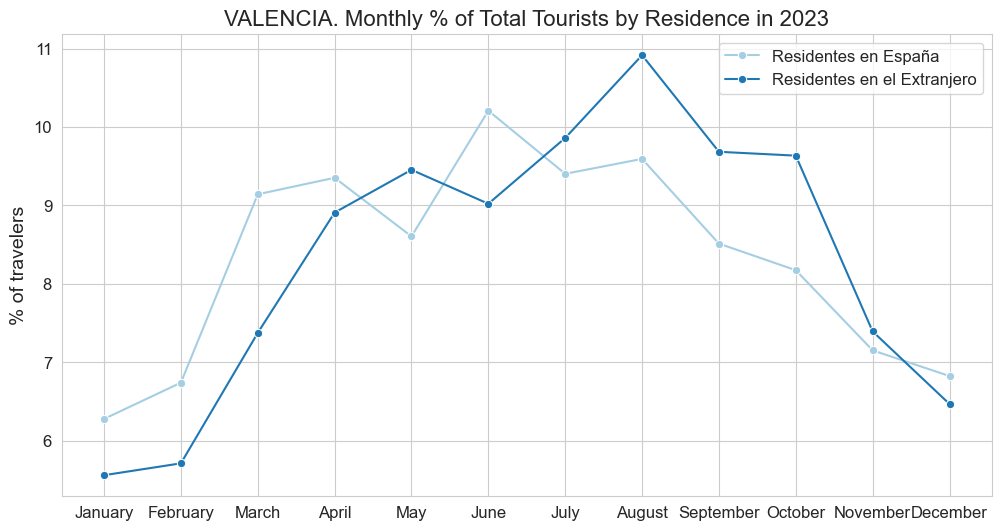

In [20]:
for prov in df['Provincias'].unique():
    res = df[(df['Provincias'] == prov) & (df['Periodo'].dt.year == 2023)]
    res['percent'] = res['total_travelers'] / res.groupby(['Residencia'])['total_travelers'].transform('sum') * 100
    
    # lineplot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=res, 
                 x=res['Periodo'].dt.month_name(), 
                 y=res['percent'], 
                 hue='Residencia', marker='o')
    
    plt.title(f'{prov.upper()}. Monthly % of Total Tourists by Residence in 2023')
    plt.xlabel(None)
    plt.ylabel('% of travelers')
    plt.legend(title=None)
    plt.show()

In [21]:
# save file to data folder
#df.to_csv(f'../Data/internatinal_vs_domestic_INE_2074.csv', index=False) 

## International travelers by country of residence
Table used: [Viajeros y pernoctaciones según país de residencia del viajero](https://www.ine.es/jaxiT3/Tabla.htm?t=2038&L=0)  
Loaded data is from 03-2022 to 03-2025.

*Notes*:
    
- `resto de la UE`: Chipre, Eslovaquia, Eslovenia, Estonia, Hungría, Letonia, Lituania y Malta, Bulgaria y Rumanía
- `UE27_2020` (Unión Europea desde el 1 de febrero de 2020 ) y `UE28` (Unión Europea desde el 1 de julio de 2013 hasta el 31 de enero de 2020) hacen referencia a la situación legal de la Unión Europea en cada momento.
- Desde marzo de 2022, se incluye "Rusia" en el agregado `Resto de Europa`

- Establecimientos hoteleros: los datos de **abril del año 2024 y posteriores** son provisionales
- Debido a distintas actualizaciones en los directorios de establecimientos, no son directamente comparables los datos de distintos años. Existen coeficientes de enlace para los períodos: año 2005, junio2009-mayo2010, julio2010-febrero2012.

### Data Loading

In [22]:
FILENAME = 'INE_Encuesta_de_ocupación_hotelera_2038.csv'

In [23]:
df = read_file(FILENAME)

RESIDENCIA/ORIGEN Países Viajeros y pernoctaciones  Periodo      Total
0             Total    NaN                   Viajero  2025M03  7.680.722
1             Total    NaN                   Viajero  2025M02  6.539.960
2             Total    NaN                   Viajero  2025M01  5.776.075
3             Total    NaN                   Viajero  2024M12  6.553.489
4             Total    NaN                   Viajero  2024M11  7.171.221

In [24]:
df['RESIDENCIA/ORIGEN'].unique()

array(['Total', 'América (sin EEUU)', 'Estados Unidos de América',
       'Japón', 'Asia (sin Japón)'], dtype=object)

In [25]:
df[df['RESIDENCIA/ORIGEN']=='Japón']

RESIDENCIA/ORIGEN Países Viajeros y pernoctaciones  Periodo   Total
2220             Japón    NaN                   Viajero  2025M03  40.196
2221             Japón    NaN                   Viajero  2025M02  37.691
2222             Japón    NaN                   Viajero  2025M01  28.733
2223             Japón    NaN                   Viajero  2024M12  32.605
2224             Japón    NaN                   Viajero  2024M11  31.239
...                ...    ...                       ...      ...     ...
2289             Japón    NaN            Pernoctaciones  2022M07  29.439
2290             Japón    NaN            Pernoctaciones  2022M06  24.511
2291             Japón    NaN            Pernoctaciones  2022M05  20.421
2292             Japón    NaN            Pernoctaciones  2022M04  20.113
2293             Japón    NaN            Pernoctaciones  2022M03  14.146

[74 rows x 5 columns]

In [26]:
df[df['RESIDENCIA/ORIGEN']=='Asia (sin Japón)']

RESIDENCIA/ORIGEN Países Viajeros y pernoctaciones  Periodo Total
2294  Asia (sin Japón)    NaN                   Viajero  2025M03   NaN
2295  Asia (sin Japón)    NaN                   Viajero  2025M02   NaN
2296  Asia (sin Japón)    NaN                   Viajero  2025M01   NaN
2297  Asia (sin Japón)    NaN                   Viajero  2024M12   NaN
2298  Asia (sin Japón)    NaN                   Viajero  2024M11   NaN
...                ...    ...                       ...      ...   ...
2363  Asia (sin Japón)    NaN            Pernoctaciones  2022M07   NaN
2364  Asia (sin Japón)    NaN            Pernoctaciones  2022M06   NaN
2365  Asia (sin Japón)    NaN            Pernoctaciones  2022M05   NaN
2366  Asia (sin Japón)    NaN            Pernoctaciones  2022M04   NaN
2367  Asia (sin Japón)    NaN            Pernoctaciones  2022M03   NaN

[74 rows x 5 columns]

In [27]:
df['Países'].unique()

array([nan, 'Residentes en España', 'Residentes en el Extranjero',
       'Alemania', 'Austria', 'Bélgica', 'Dinamarca', 'Finlandia',
       'Francia', 'Grecia', 'Irlanda', 'Italia', 'Luxemburgo',
       'Países Bajos', 'Polonia', 'Portugal', 'República Checa', 'Suecia',
       'Resto de la U.E.', 'Noruega', 'Reino Unido', 'Rusia', 'Suiza',
       'Otros Países Europeos', 'África', 'UE28 sin España',
       'UE27_2020 sin España', 'Resto del Mundo'], dtype=object)

In [28]:
df[df['Total'].isna()]['Países'].value_counts()

Países
Rusia    74
Name: count, dtype: int64

In [29]:
df[df['Total'].isna()]['RESIDENCIA/ORIGEN'].value_counts()

RESIDENCIA/ORIGEN
Total               74
Asia (sin Japón)    74
Name: count, dtype: int64

### Data cleaning

In [30]:
# drop rows without stat
df = df.dropna(subset='Total')

# fill NaN in country column
df['Países'] = df['Países'].fillna(df['RESIDENCIA/ORIGEN'])

In [31]:
# 'Viajeros y pernoctaciones' to 2 different columns
df = (df.drop('RESIDENCIA/ORIGEN', axis=1)
        .pivot(index=['Países', 'Periodo'], columns='Viajeros y pernoctaciones', values='Total')
        .reset_index()
        .rename(columns={'Viajero': 'total_travelers', 'Pernoctaciones': 'total_overnight_stays'})
     )
df.columns.name = None

In [32]:
# change data types
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%YM%m')
df['total_overnight_stays'] = df['total_overnight_stays'].str.replace('.', '', regex=False).astype(int)
df['total_travelers'] = df['total_travelers'].str.replace('.', '', regex=False).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Países                 1110 non-null   object        
 1   Periodo                1110 non-null   datetime64[ns]
 2   total_overnight_stays  1110 non-null   int64         
 3   total_travelers        1110 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.8+ KB


In [33]:
# add column with average stay (days)
df['avg_stay'] = df['total_overnight_stays'] / df['total_travelers']

In [34]:
df_total = df[df['Países'].isin(['Residentes en España', 'Residentes en el Extranjero'])]
df = df[~df['Países'].isin(['Total', 'Residentes en España', 'Residentes en el Extranjero',
                            'UE27_2020 sin España', 'UE28 sin España'])]

In [35]:
translations = {
    'Alemania': 'Germany',
    'América (sin EEUU)': 'America (excl. USA)',
    'Austria': 'Austria',
    'Bélgica': 'Belgium',
    'Dinamarca': 'Denmark',
    'Estados Unidos de América': 'USA',
    'Finlandia': 'Finland',
    'Francia': 'France',
    'Grecia': 'Greece',
    'Irlanda': 'Ireland',
    'Italia': 'Italy',
    'Japón': 'Japan',
    'Luxemburgo': 'Luxembourg',
    'Noruega': 'Norway',
    'Otros Países Europeos': 'Other Europe',
    'Países Bajos': 'Netherlands',
    'Polonia': 'Poland',
    'Portugal': 'Portugal',
    'Reino Unido': 'UK',
    'República Checa': 'Czech Republic',
    'Resto de la U.E.': 'Rest of the EU',
    'Resto del Mundo': 'Rest of the World',
    'Suecia': 'Sweden',
    'Suiza': 'Switzerland',
    'África': 'Africa'
}

df['countries'] = df['Países'].map(translations)
df

Países    Periodo  total_overnight_stays  total_travelers  avg_stay  \
0     Alemania 2022-03-01                1971226           358345      5.50   
1     Alemania 2022-04-01                2858295           565194      5.06   
2     Alemania 2022-05-01                3668543           760733      4.82   
3     Alemania 2022-06-01                4688446           862263      5.44   
4     Alemania 2022-07-01                4502389           776051      5.80   
...        ...        ...                    ...              ...       ...   
1105    África 2024-11-01                 158090            58187      2.72   
1106    África 2024-12-01                 179831            67487      2.66   
1107    África 2025-01-01                 165119            64587      2.56   
1108    África 2025-02-01                 155350            61144      2.54   
1109    África 2025-03-01                 119418            38275      3.12   

     countries  
0      Germany  
1      Germany  
2      Germany  
3      Germany  
4      Germany  
...        ...  
1105    Africa  
1106    Africa  
1107    Africa  
1108    Africa  
1109    Africa  

[925 rows x 6 columns]

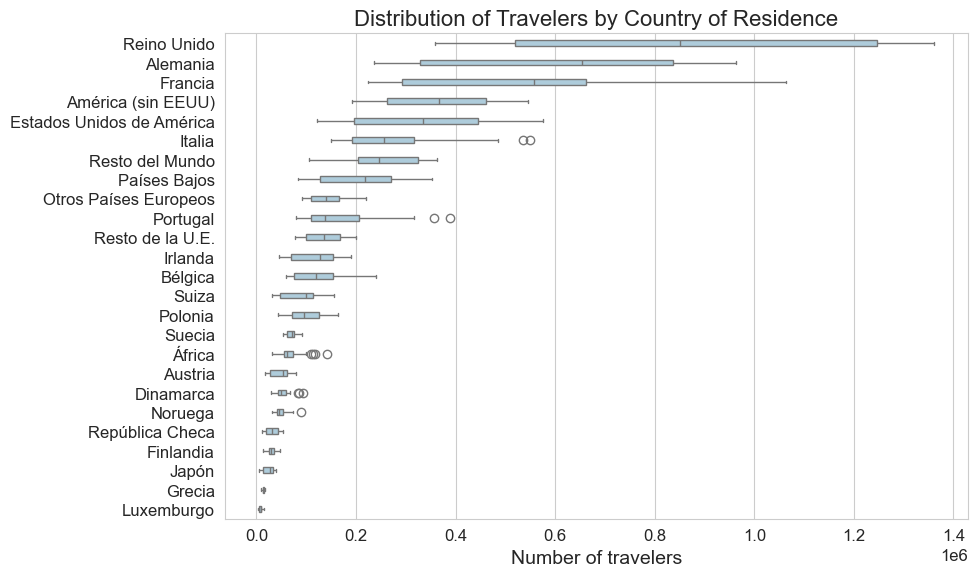

In [36]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            y='Países', 
            x='total_travelers',
            width=0.3,
            order=df.groupby('Países')['total_travelers'].median().sort_values(ascending=False).index)

plt.xlabel('Number of travelers')
plt.ylabel(None)
plt.title('Distribution of Travelers by Country of Residence')
plt.tight_layout()
plt.show()

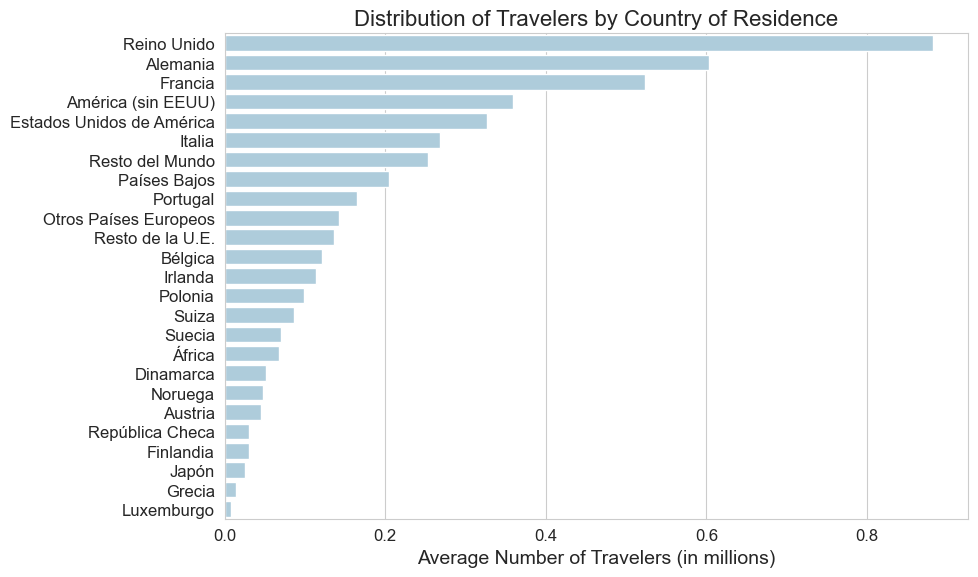

In [37]:
# means for ordering
mean_order = df.groupby('Países')['total_travelers'].mean().sort_values(ascending=False).index

# barplot 
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            y='Países',
            x=df['total_travelers'] / 1000000,
            estimator='mean',
            order=mean_order,
            errorbar=None)

plt.xlabel('Average Number of Travelers (in millions)')
plt.ylabel(None)
plt.title('Distribution of Travelers by Country of Residence')
plt.tight_layout()
plt.show()

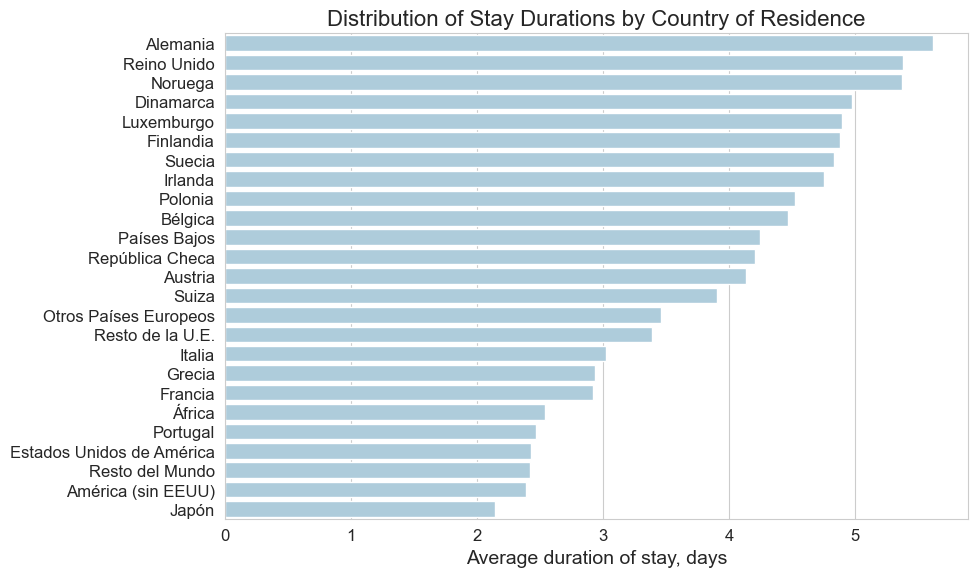

In [38]:
# means for ordering
mean_order = df.groupby('Países')['avg_stay'].mean().sort_values(ascending=False).index

# barplot 
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            y='Países',
            x='avg_stay',
            estimator='mean',
            order=mean_order,
            errorbar=None)

plt.xlabel('Average duration of stay, days')
plt.ylabel(None)
plt.title('Distribution of Stay Durations by Country of Residence')
plt.tight_layout()
plt.show()

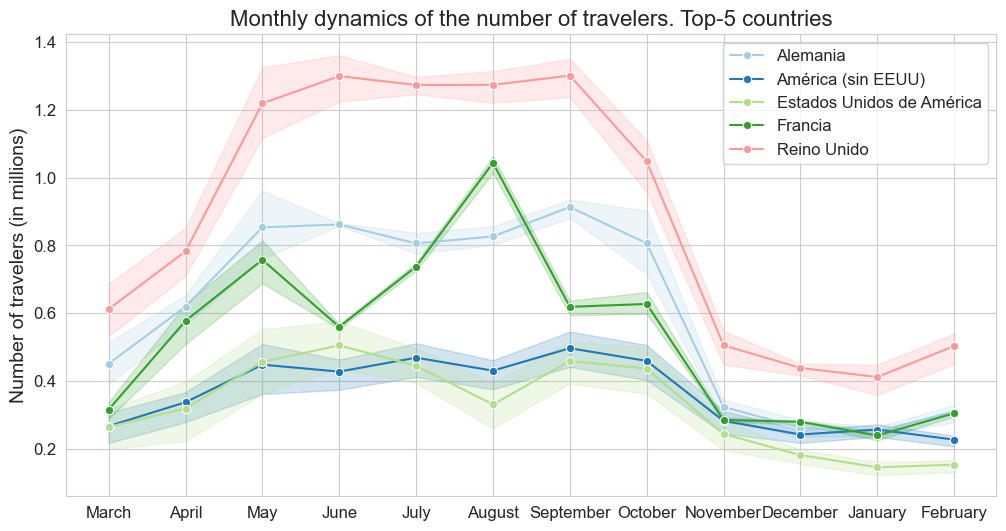

In [39]:
# top 5 countries by overall mean
top5_paises = df.groupby('Países')['total_travelers'].mean().nlargest(5).index
df_top5 = df[df['Países'].isin(top5_paises)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top5, x=df['Periodo'].dt.month_name(), y=df['total_travelers']/1000000, hue='Países', marker='o')

plt.title('Monthly dynamics of the number of travelers. Top-5 countries')
plt.xlabel(None)
plt.ylabel('Number of travelers (in millions)')
plt.legend(title=None)
plt.show()

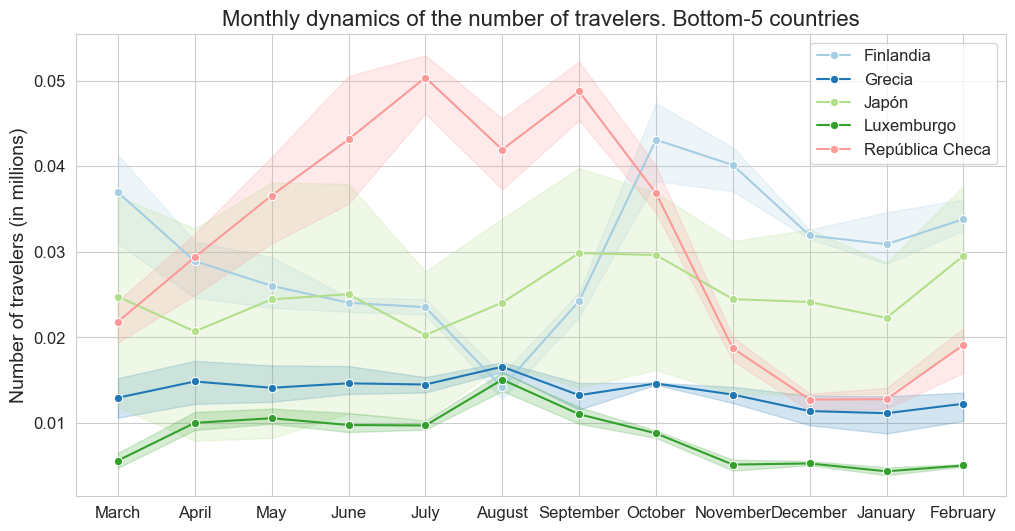

In [40]:
# bottom 5 countries by overall mean
bottom5_paises = df.groupby('Países')['total_travelers'].mean().nsmallest(5).index
df_bottom5 = df[df['Países'].isin(bottom5_paises)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_bottom5, x=df_bottom5['Periodo'].dt.month_name(), y=df['total_travelers']/1000000, hue='Países', marker='o')

plt.title('Monthly dynamics of the number of travelers. Bottom-5 countries')
plt.xlabel(None)
plt.ylabel('Number of travelers (in millions)')
plt.legend(title=None)
plt.show()

In [41]:
# save file to data folder
#df.to_csv(f'../Data/international_INE_2038.csv', index=False) 

## Domestic travelers by province and the autonomous community of origin
Table used: [Distribución porcentual de viajeros y pernoctaciones en cada provincia según comunidad autónoma de procedencia](https://www.ine.es/jaxiT3/Tabla.htm?t=2069&L=0)  
Loaded data is from 01-2022 to 03-2025.

*Notes*:  
Units: Percent

- Debido a distintas actualizaciones en los directorios de establecimientos, no son directamente comparables los datos de distintos años. Existen coeficientes de enlace para los períodos: año 2005, junio2009-mayo2010, julio2010-febrero2012.
- Establecimientos hoteleros: los datos de **abril del año 2024 y posteriores** son provisionales.

### Data Loading

In [42]:
FILENAME = 'INE_Encuesta_de_ocupación_hotelera_2069.csv'

In [43]:
df = read_file(FILENAME)

Totales Territoriales         Provincias Totales Territoriales.1  \
0        Total Nacional  07 Balears, Illes          Total Nacional   
1        Total Nacional  07 Balears, Illes          Total Nacional   
2        Total Nacional  07 Balears, Illes          Total Nacional   
3        Total Nacional  07 Balears, Illes          Total Nacional   
4        Total Nacional  07 Balears, Illes          Total Nacional   

  Comunidades y Ciudades Autónomas Viajeros y pernoctaciones  Periodo Total  
0                     01 Andalucía                   Viajero  2025M03  6,17  
1                     01 Andalucía                   Viajero  2025M02  5,58  
2                     01 Andalucía                   Viajero  2025M01  8,15  
3                     01 Andalucía                   Viajero  2024M12  4,46  
4                     01 Andalucía                   Viajero  2024M11  4,54

In [44]:
for col in df.drop(['Periodo', 'Total'], axis=1):
    print(df[col].unique())
    print('*****')

['Total Nacional']
*****
['07 Balears, Illes' '08 Barcelona' '17 Girona' '28 Madrid' '29 Málaga'
 '41 Sevilla' '46 Valencia/València']
*****
['Total Nacional']
*****
['01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La' '18 Ceuta' '19 Melilla']
*****
['Viajero' 'Pernoctaciones']
*****


### Data Cleaning

In [45]:
df.isna().sum()

Totales Territoriales                0
Provincias                           0
Totales Territoriales.1              0
Comunidades y Ciudades Autónomas     0
Viajeros y pernoctaciones            0
Periodo                              0
Total                               30
dtype: int64

In [46]:
df = (df.drop(['Totales Territoriales', 'Totales Territoriales.1'], axis=1)
        .dropna(subset='Total'))
df.isna().sum()

Provincias                          0
Comunidades y Ciudades Autónomas    0
Viajeros y pernoctaciones           0
Periodo                             0
Total                               0
dtype: int64

In [47]:
# 'Viajeros y pernoctaciones' to 2 different columns
df = (df.pivot(index=['Provincias', 'Comunidades y Ciudades Autónomas', 'Periodo'], columns='Viajeros y pernoctaciones', values='Total')
        .reset_index()
        .rename(columns={'Viajero': 'total_travelers', 'Pernoctaciones': 'total_overnight_stays'})
     )
df.columns.name = None

In [48]:
# change data types
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%YM%m')
df['total_overnight_stays'] = df['total_overnight_stays'].str.replace(',', '.', regex=False).astype(float)
df['total_travelers'] = df['total_travelers'].str.replace(',', '.', regex=False).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Provincias                        5172 non-null   object        
 1   Comunidades y Ciudades Autónomas  5172 non-null   object        
 2   Periodo                           5172 non-null   datetime64[ns]
 3   total_overnight_stays             5172 non-null   float64       
 4   total_travelers                   5172 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 202.2+ KB


In [49]:
df['Provincias'].unique()

array(['07 Balears, Illes', '08 Barcelona', '17 Girona', '28 Madrid',
       '29 Málaga', '41 Sevilla', '46 Valencia/València'], dtype=object)

In [50]:
# clean the 'Provincias' column
df['Provincias'] = df['Provincias'].str.replace(r'^\d+\s*', '', regex=True)
df['Provincias'] = df['Provincias'].str.split(r'[/,]').str[0]

df['Provincias'].unique()

array(['Balears', 'Barcelona', 'Girona', 'Madrid', 'Málaga', 'Sevilla',
       'Valencia'], dtype=object)

In [51]:
df['Comunidades y Ciudades Autónomas'].unique()

array(['01 Andalucía', '02 Aragón', '03 Asturias, Principado de',
       '04 Balears, Illes', '05 Canarias', '06 Cantabria',
       '07 Castilla y León', '08 Castilla - La Mancha', '09 Cataluña',
       '10 Comunitat Valenciana', '11 Extremadura', '12 Galicia',
       '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)

In [52]:
# clean the 'Comunidades y Ciudades Autónomas' column
df['Comunidades y Ciudades Autónomas'] = df['Comunidades y Ciudades Autónomas'].str.replace(r'^\d+\s*', '', regex=True)
df['Comunidades y Ciudades Autónomas'] = df['Comunidades y Ciudades Autónomas'].str.split(r'[/,]').str[0]
df = df.rename(columns={'Comunidades y Ciudades Autónomas': 'Residencia'})

df['Residencia'].unique()

array(['Andalucía', 'Aragón', 'Asturias', 'Balears', 'Canarias',
       'Cantabria', 'Castilla y León', 'Castilla - La Mancha', 'Cataluña',
       'Comunitat Valenciana', 'Extremadura', 'Galicia', 'Madrid',
       'Murcia', 'Navarra', 'País Vasco', 'Rioja', 'Ceuta', 'Melilla'],
      dtype=object)

In [53]:
df['Periodo'].min(), df['Periodo'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2025-03-01 00:00:00'))

In [54]:
# add column with average stay (days)
df['avg_stay'] = df['total_overnight_stays'] / df['total_travelers']

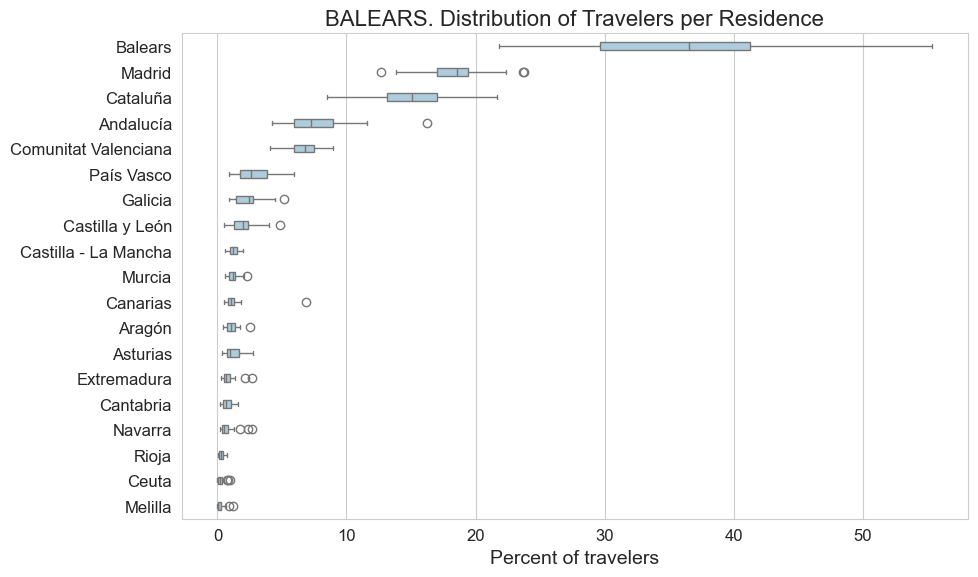

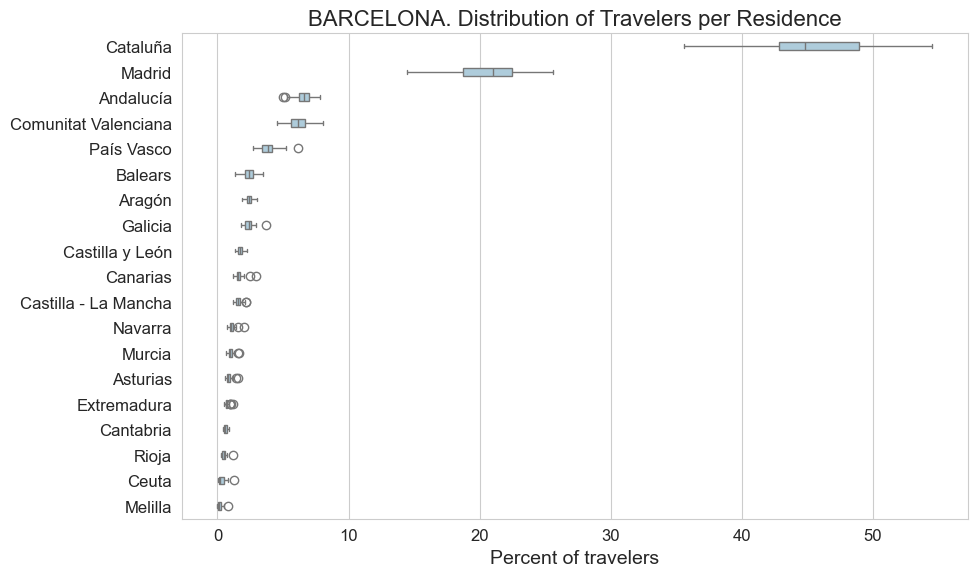

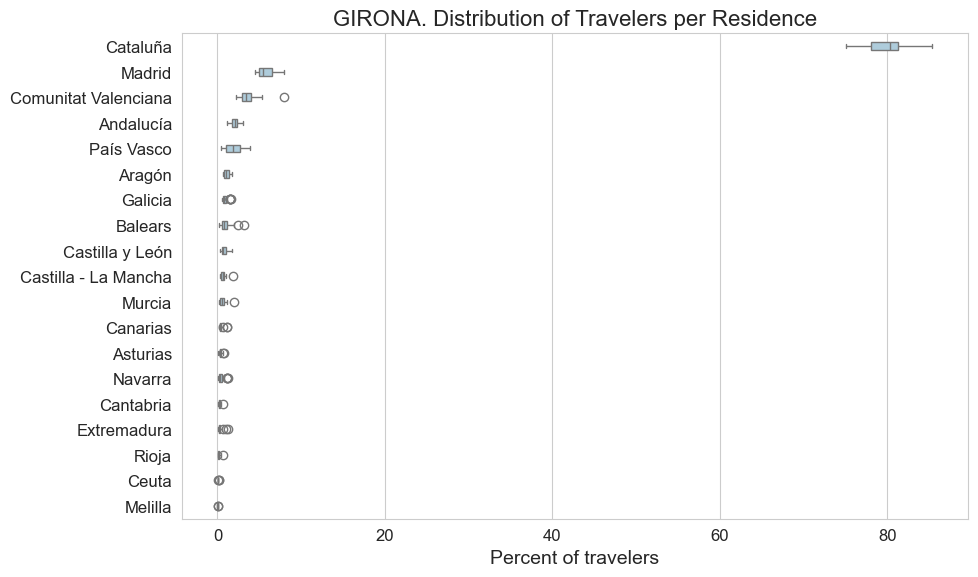

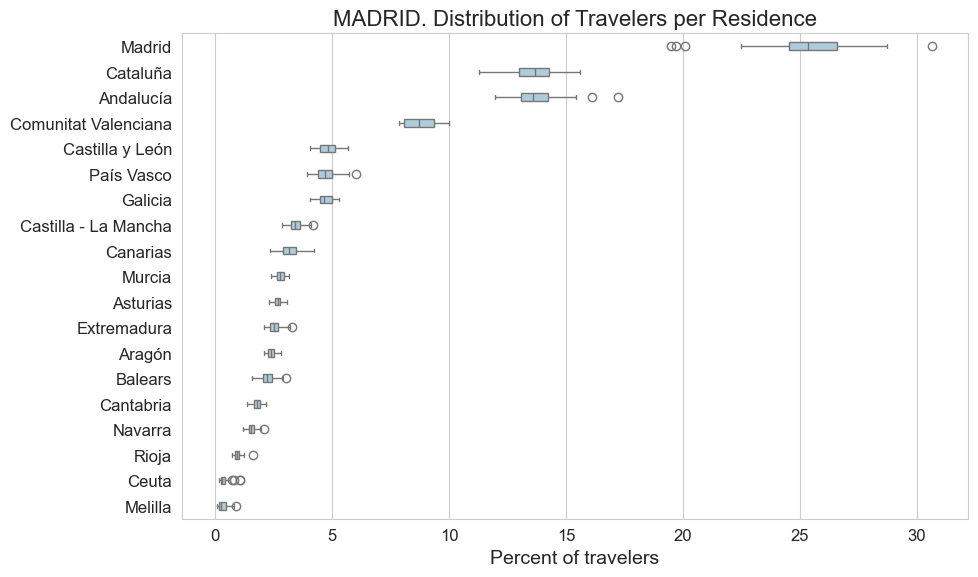

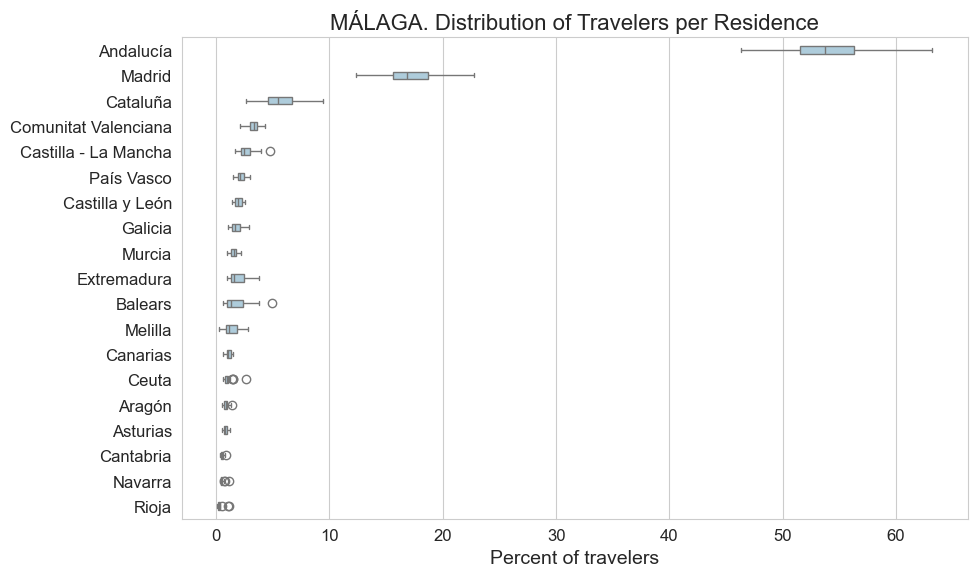

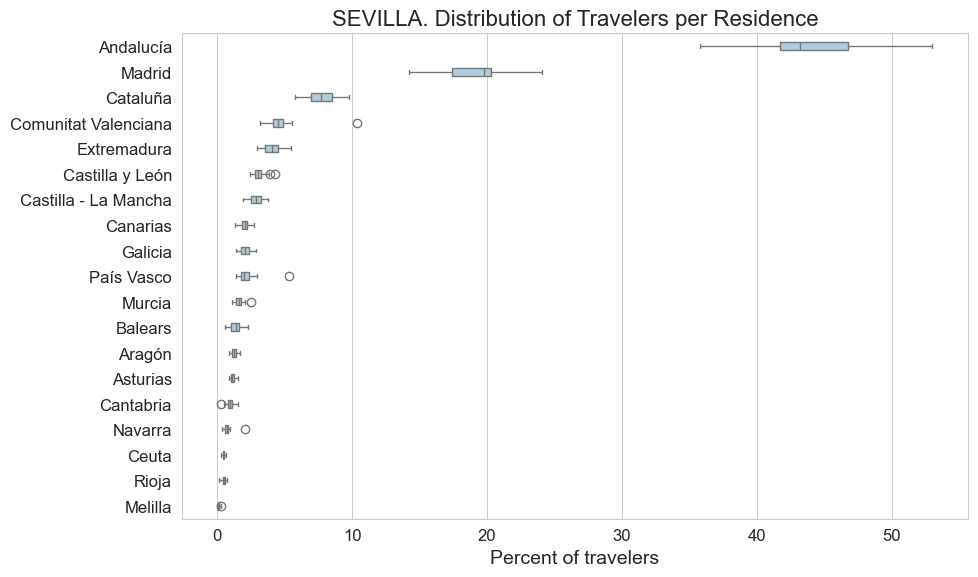

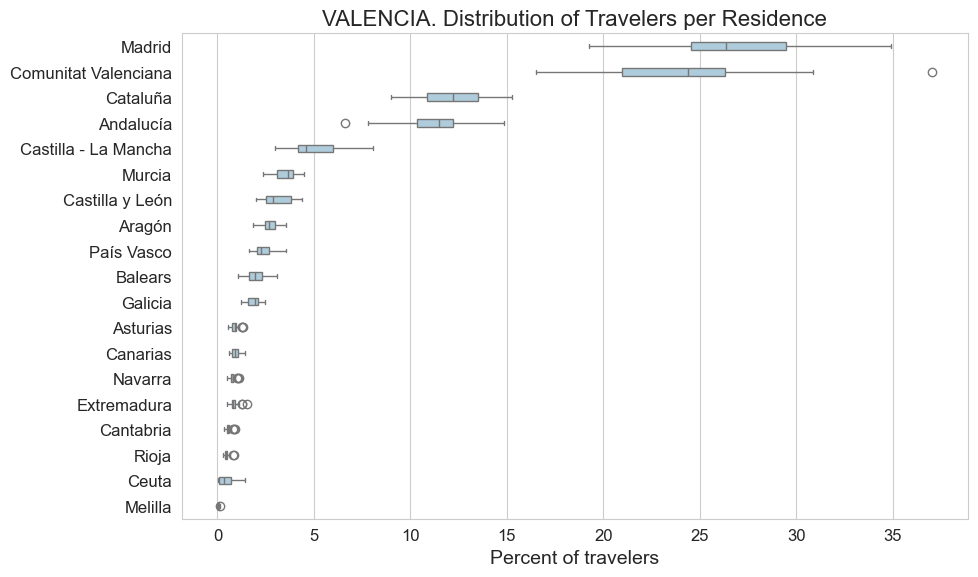

In [55]:
for prov in df['Provincias'].unique():
    df_prov = df.query('Provincias == @prov')
    # boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_prov, 
                y='Residencia', 
                x='total_travelers',
                width=0.3,
                order=df_prov.groupby('Residencia')['total_travelers'].median().sort_values(ascending=False).index)

    plt.xlabel('Percent of travelers')
    plt.ylabel(None)
    plt.title(f'{prov.upper()}. Distribution of Travelers per Residence')
    plt.tight_layout()
    plt.show()

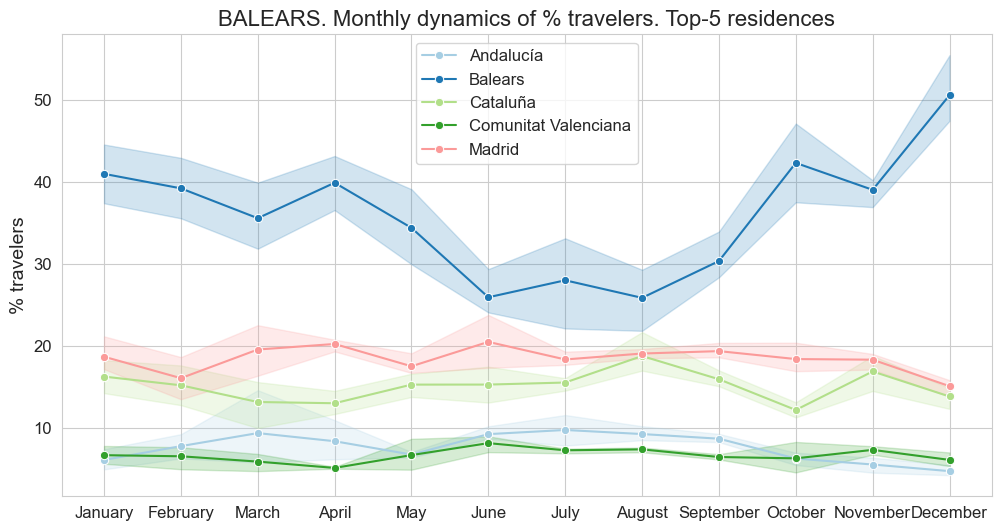

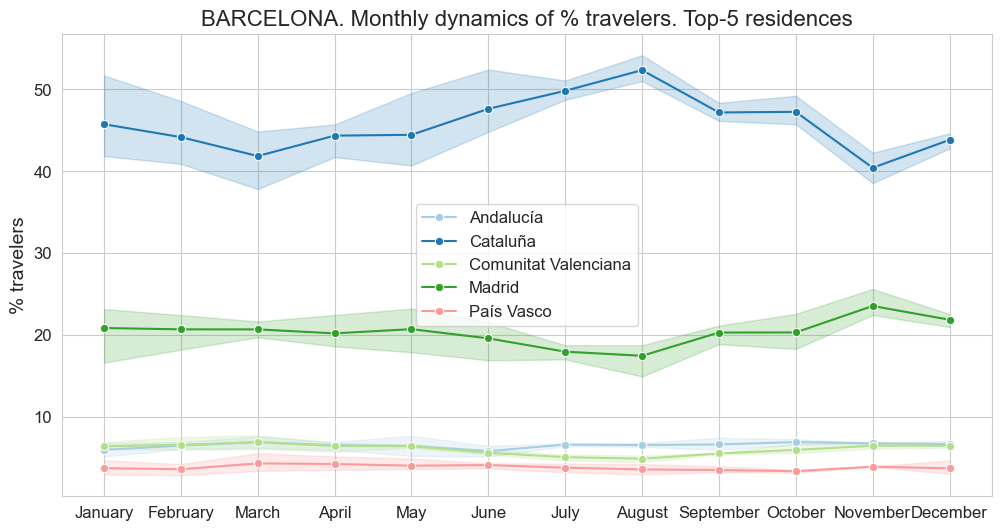

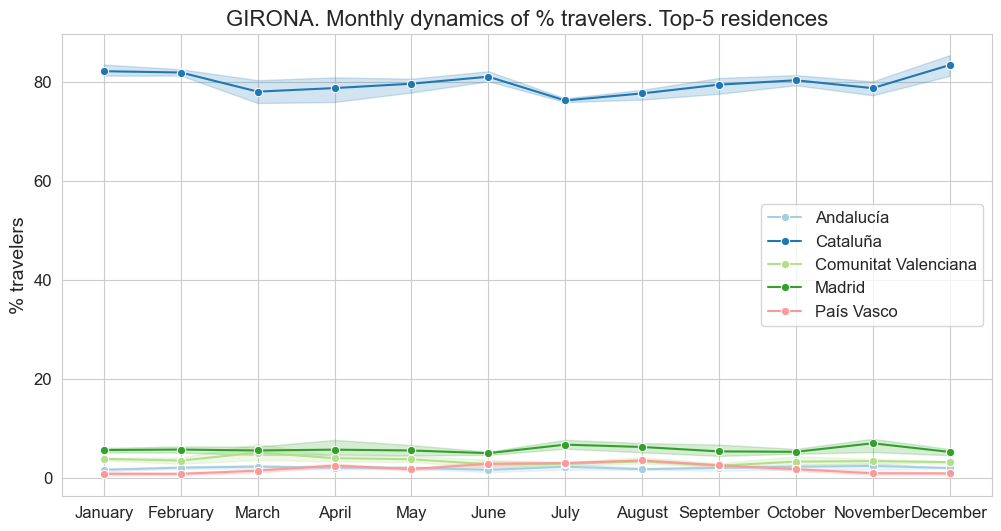

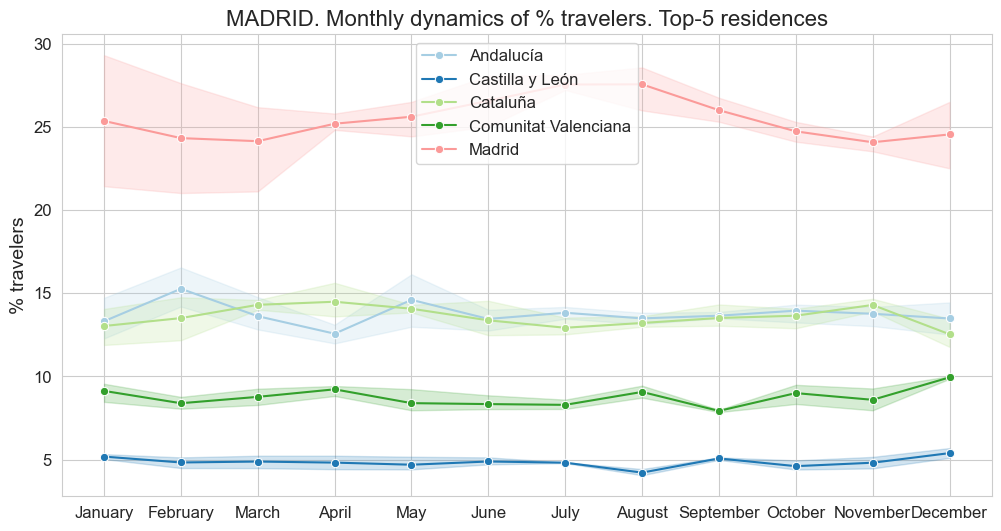

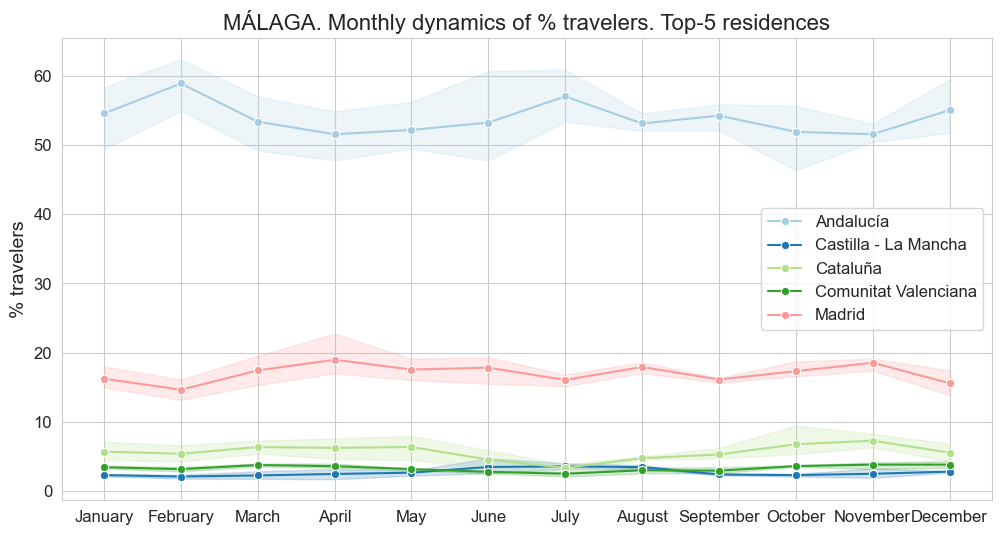

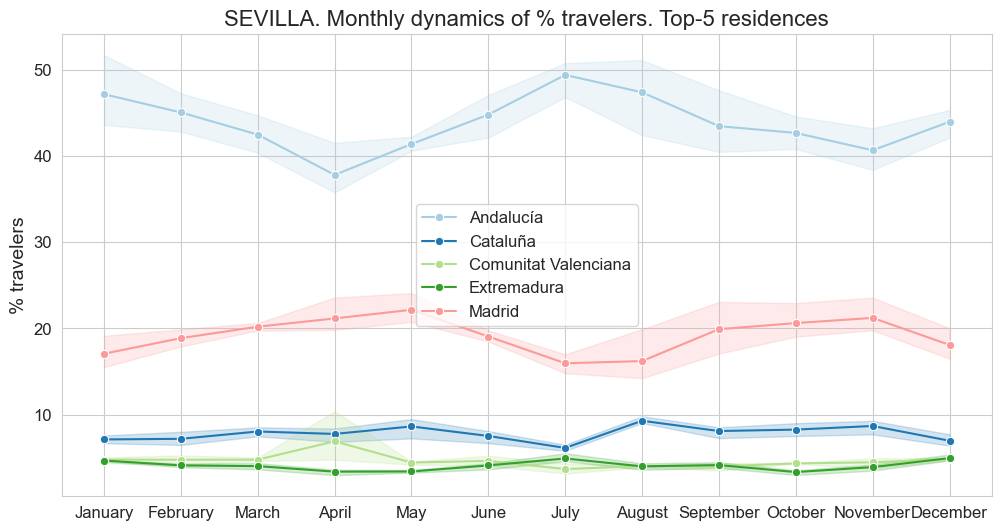

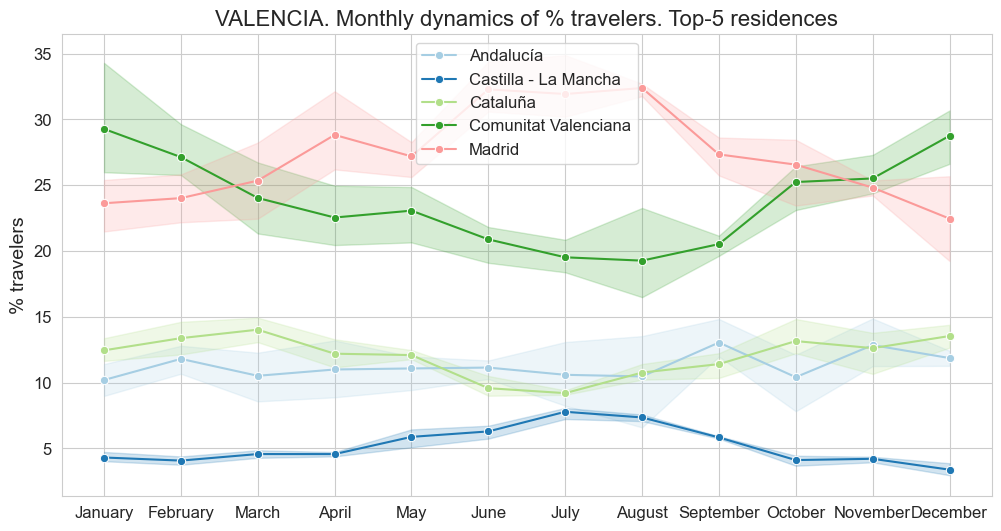

In [56]:
for prov in df['Provincias'].unique():
    df_prov = df.query('Provincias == @prov')
    # top 5 residences by overall mean
    top5_residence = df_prov.groupby('Residencia')['total_travelers'].mean().nlargest(5).index
    df_top5 = df_prov[df_prov['Residencia'].isin(top5_residence)]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_top5, x=df_top5['Periodo'].dt.month_name(), y='total_travelers', hue='Residencia', marker='o')
    
    plt.title(f'{prov.upper()}. Monthly dynamics of % travelers. Top-5 residences')
    plt.xlabel(None)
    plt.ylabel('% travelers')
    plt.legend(title=None)
    plt.show()

In [57]:
# save file to data folder
#df.to_csv(f'../Data/domestic_INE_2069.csv', index=False) 